In [2]:
import pandas as pd
import string
import spacy
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
tweets = pd.read_csv('C:/Users/Administrator/Downloads/Python_files_material/Excelr assignments/Text Mining/Elon_musk.csv', encoding = 'Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
tweets = [Text.strip() for Text in tweets.Text]
tweets=[Text for Text in tweets if Text]

In [6]:
tweets_text=' '.join(tweets)

In [7]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [8]:
tweets_tokens_text=' '.join(tweets_tokens)

In [9]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))

In [10]:
import re
no_url_text = re.sub(r'http\S+', '', no_punc_text)

In [13]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
print(text_tokens[0:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [14]:
len(text_tokens)

17847

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['I', '\x92', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
lower_words = [x.lower() for x in no_stop_tokens]

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:100])

['i', '\x92', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', '\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'u0001f923', 'u0001f923', 'thi', 'true', 'power', 'haha', 'ani', 'crypto', 'wallet', '\x92', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first']


In [19]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 6.4 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
nlp = spacy.load('en_core_web_sm')

In [21]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:100])

I  alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself Haha thanks Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely Just sent Just agree Clubhouse It  getting real Bought Dogecoin lil X toddler hodler He definitely issues sentencing seems bit high Thanks fixing Please unlock account U0001F923 U0001F923 This true power haha Any crypto wallet  give private keys avoided costs Your app sucks RT NASA selected Falcon Heavy launch first


In [22]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['I', '\x92', 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'great', 'interview', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'Haha', 'thank', 'indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'Clubhouse', 'it', '\x92', 'get', 'real', 'Bought', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', '\x92', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'RT', 'NASA', 'select', 'Falcon', 'Heavy', 'launch', 'first']


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [24]:
print(vectorizer.vocabulary_)

{'alien': 195, 'ray': 2377, 'trace': 3052, 'cyberpunk': 772, 'hdr': 1370, 'nextlevel': 1981, 'have': 1365, 'try': 3084, 'great': 1317, 'interview': 1570, 'doge': 897, 'underestimate': 3221, 'congratulations': 680, 'tesla': 2957, 'china': 587, 'amazing': 219, 'execution': 1067, 'last': 1655, 'year': 3442, 'now': 2009, 'next': 1980, 'even': 1042, 'happy': 1352, 'new': 1978, 'ox': 2109, 'frodo': 1219, 'underdoge': 3220, 'all': 198, 'thought': 2994, 'would': 3427, 'fail': 1101, 'himself': 1412, 'haha': 1341, 'thank': 2968, 'indeed': 1509, 'tweets': 3102, 'definitely': 810, 'represent': 2444, 'realworld': 2392, 'time': 3011, 'allocation': 200, 'the': 2973, 'entertaining': 1012, 'outcome': 2088, 'likely': 1710, 'just': 1612, 'send': 2589, 'agree': 179, 'clubhouse': 617, 'it': 1589, 'get': 1279, 'real': 2387, 'bought': 461, 'dogecoin': 899, 'lil': 1711, 'toddler': 3022, 'hodler': 1418, 'he': 1371, 'issue': 1588, 'sentencing': 2594, 'seem': 2581, 'bit': 422, 'high': 1404, 'fix': 1165, 'please'

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

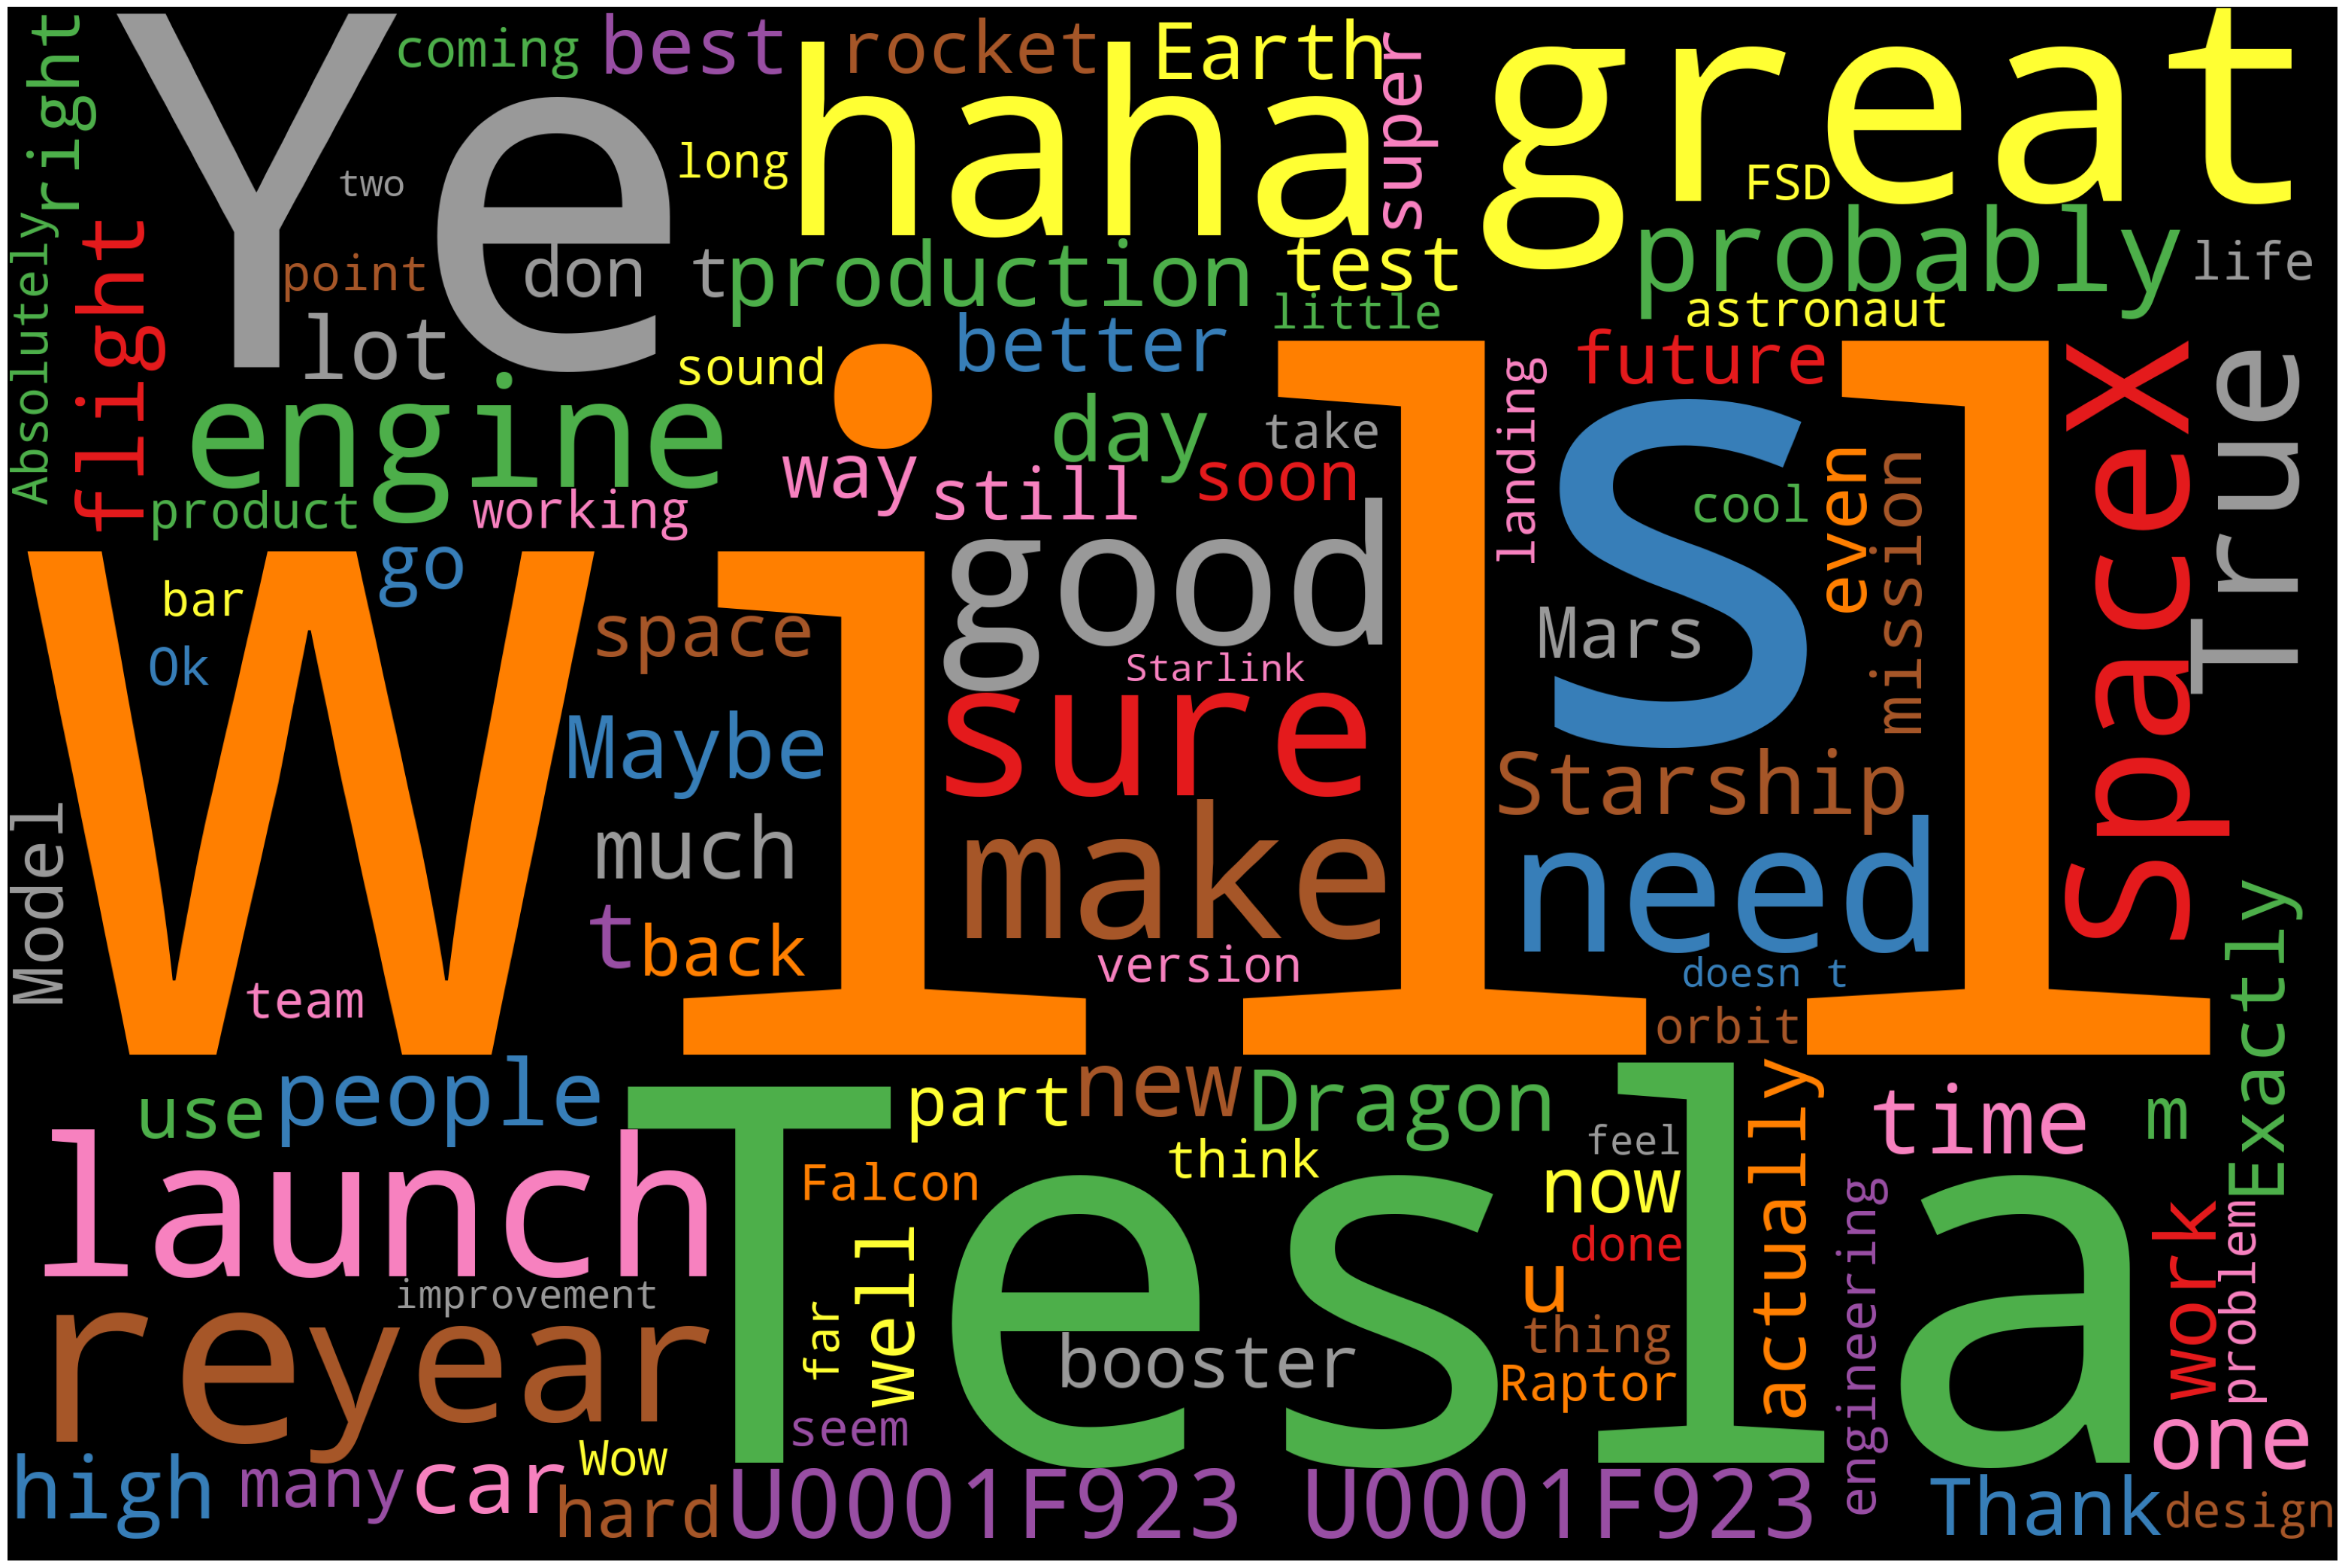

In [30]:
stopwords = STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set1',stopwords=stopwords).generate(no_url_text)
plot_cloud(wordcloud)